# Budget Analysis

---

## Environment Setup

In [29]:
# Initial Imports
import os
import plaid
import requests
import datetime
import json
import pandas as pd
from dotenv import load_dotenv
from plaid import Client

%matplotlib inline

In [30]:
# Helper functions

def pretty_print_response(response):
    """
    This function formats a JSON file to pretty printing it in the screen.
    """
    print(json.dumps(response, indent=4, sort_keys=True))

In [31]:
# Set environment variables from the .env file
load_dotenv()

True

In [32]:
# Extract API keys from environment variables
PLAID_CLIENT_ID = os.getenv("PLAID_CLIENT_ID")
PLAID_SBX_SECRET_KEY = os.getenv("PLAID_SBX_SECRET_KEY")
PLAID_PUBLIC_KEY = os.getenv("PLAID_PUBLIC_KEY")

# check that this worked by printing the length of the variables without printing them

print (len(PLAID_CLIENT_ID))
print (len(PLAID_PUBLIC_KEY))
print (len(PLAID_SBX_SECRET_KEY))

24
30
30


---

## Plaid Access Token

In this section, you will use the `plaid-python` API to generate the correct authentication tokens to access data in the free developer Sandbox. This mimics how you might connect to your own account or a customer account, but due to privacy issues, this homework will only require connecting to and analyzing the fake data from the developer sandbox that Plaid provides. 

Complete the following steps to generate an access token:

1. Create a client to connect to plaid

2. Use the client to generate a public token and request the following items: ['transactions', 'income', 'assets']

3. Exchange the public token for an access token

4. Test the access token by requesting and printing the available test accounts

In [41]:
# this didn't work with my plaid API keys, I kept getting a no public token error.to get it to work the tutor gave me her API Keys.
# and I hard coded hers here. When I was using mine I would get a new access token everytime I tried but I got the error
# "no such token".

PLAID_CLIENT_ID = '5e98de05631dc90012e6d560'
PLAID_SBX_SECRET_KEY = 'cde66d4a67ea8ac51c5c5151e7128e'
PLAID_PUBLIC_KEY = 'ea42a8f2c854fc886ffbd45a758100'


### 1. Create a client to connect to plaid

In [42]:
# Create the client object

client = plaid.Client(client_id=PLAID_CLIENT_ID, secret=PLAID_SBX_SECRET_KEY, public_key=PLAID_PUBLIC_KEY, environment='sandbox', api_version = '2019-05-29')


In [43]:
# Set the institution id

INSTITUTION_ID = "ins_109508"

### 2. Generate a public token

In [44]:
# Create the public token

create_tkn_response = client.Sandbox.public_token.create(INSTITUTION_ID, ['transactions','income','assets'])

# Print the public token

public_token=create_tkn_response['public_token']

print({public_token})


{'public-sandbox-297bec5c-80d8-4827-8bfa-5406ca63f011'}


### 3. Exchange the public token for an access token

In [45]:
# Retrieve the access token

#print({public_token})

exchange_response = client.Item.public_token.exchange(create_tkn_response['public_token'])

# Print the access token

print(exchange_response['access_token'])


access-sandbox-676ff8f5-d262-4c3b-8f39-c57b9e6012e4


In [46]:
# Store the access token in a Python variable

exchange_response = client.Item.public_token.exchange(create_tkn_response['public_token'])

#print(exchange_response['access_token'])

access_token = exchange_response['access_token']

print(access_token)


access-sandbox-676ff8f5-d262-4c3b-8f39-c57b9e6012e4


### 4. Fetch Accounts

In [47]:
# Retrieve accounts

client.Accounts.get(access_token)

# Print accounts


{'accounts': [{'account_id': '63pkVJKVyzF8y7x3AA4MInoQenxXZkugeZN1K',
   'balances': {'available': 100,
    'current': 110,
    'iso_currency_code': 'USD',
    'limit': None,
    'unofficial_currency_code': None},
   'mask': '0000',
   'name': 'Plaid Checking',
   'official_name': 'Plaid Gold Standard 0% Interest Checking',
   'subtype': 'checking',
   'type': 'depository'},
  {'account_id': 'Xex3mpkmKaImK5rl77wahQVKwQ4MpLfdLZV1K',
   'balances': {'available': 200,
    'current': 210,
    'iso_currency_code': 'USD',
    'limit': None,
    'unofficial_currency_code': None},
   'mask': '1111',
   'name': 'Plaid Saving',
   'official_name': 'Plaid Silver Standard 0.1% Interest Saving',
   'subtype': 'savings',
   'type': 'depository'},
  {'account_id': 'DLJENKQNyMHPagj5bb1oHVadlV6zKXuvJDV4q',
   'balances': {'available': None,
    'current': 1000,
    'iso_currency_code': 'USD',
    'limit': None,
    'unofficial_currency_code': None},
   'mask': '2222',
   'name': 'Plaid CD',
   'officia

---

# Account Transactions with Plaid

In this section, you will use the Plaid Python SDK to connect to the Developer Sandbox account and grab a list of transactions. You will need to complete the following steps:


1. Use the access token to fetch the transactions for the last 90 days

2. Print the categories for each transaction type

3. Create a new DataFrame using the following fields from the JSON transaction data: `date, name, amount, category`. (For categories with more than one label, just use the first category label in the list)

4. Convert the data types to the appropriate types (i.e. datetimeindex for the date and float for the amount)

### 1. Fetch the Transactions for the last 90 days

In [50]:
# Set the start and end date 90 days from today

start_date = '{:%Y-%m-%d}'.format(datetime.datetime.now() + datetime.timedelta(-90))
end_date = '{:%Y-%m-%d}'.format(datetime.datetime.now())

# Get transactions for date range
transactions_response = client.Transactions.get(access_token,start_date,end_date)

# Print the transaction
print(json.dumps(transactions_response['transactions'][:2],indent=4, sort_keys=True))




[
    {
        "account_id": "VjBznoKnkxInNzb5PPB3fLwNMLno7WfWE1xqB",
        "account_owner": null,
        "amount": 500,
        "authorized_date": null,
        "category": [
            "Travel",
            "Airlines and Aviation Services"
        ],
        "category_id": "22001000",
        "date": "2020-07-29",
        "iso_currency_code": "USD",
        "location": {
            "address": null,
            "city": null,
            "country": null,
            "lat": null,
            "lon": null,
            "postal_code": null,
            "region": null,
            "store_number": null
        },
        "merchant_name": "United Airlines",
        "name": "United Airlines",
        "payment_channel": "in store",
        "payment_meta": {
            "by_order_of": null,
            "payee": null,
            "payer": null,
            "payment_method": null,
            "payment_processor": null,
            "ppd_id": null,
            "reason": null,
            "refer

### 2. Print the categories for each transaction

In [51]:
# Create a for-loop to print the categories for each transaction

for transactions in transactions_response['transactions']:
    print(json.dumps(transactions['category'], sort_keys=True))


["Travel", "Airlines and Aviation Services"]
["Travel", "Taxi"]
["Food and Drink", "Restaurants"]
["Payment"]
["Food and Drink", "Restaurants", "Fast Food"]
["Shops", "Sporting Goods"]
["Payment", "Credit Card"]
["Travel", "Taxi"]
["Transfer", "Debit"]
["Transfer", "Deposit"]
["Recreation", "Gyms and Fitness Centers"]
["Travel", "Airlines and Aviation Services"]
["Food and Drink", "Restaurants", "Fast Food"]
["Food and Drink", "Restaurants", "Coffee Shop"]
["Food and Drink", "Restaurants"]
["Transfer", "Credit"]
["Travel", "Airlines and Aviation Services"]
["Travel", "Taxi"]
["Food and Drink", "Restaurants"]
["Payment"]
["Food and Drink", "Restaurants", "Fast Food"]
["Shops", "Sporting Goods"]
["Payment", "Credit Card"]
["Travel", "Taxi"]
["Transfer", "Debit"]
["Transfer", "Deposit"]
["Recreation", "Gyms and Fitness Centers"]
["Travel", "Airlines and Aviation Services"]
["Food and Drink", "Restaurants", "Fast Food"]
["Food and Drink", "Restaurants", "Coffee Shop"]
["Food and Drink", "R

### 3. Create a new DataFrame using the following fields from the JSON transaction data: `date`, `name`, `amount`, `category`. 

(For categories with more than one label, just use the first category label in the list)

In [52]:
# Define an empty DataFrame and set the columns as date, name, amount, and category

transactions_df = pd.DataFrame(columns=['date', 'name', 'amount', 'category'])

# Get transactions for date range - they are already stored as transaction_response

transactions = transactions_response["transactions"]

# Populate the transactions DataFrame with the transactions data

for index, transaction in enumerate(transactions):
    transactions_df.loc[index] = [transaction['date'], transaction['name'], transaction['amount'], transaction['category'][0]]

# Display sample data from the DataFrame    

transactions_df.head()

,date,name,amount,category
0,2020-07-29,United Airlines,500,Travel
1,2020-07-27,Uber 072515 SF**POOL**,6.33,Travel
2,2020-07-24,Tectra Inc,500,Food and Drink
3,2020-07-23,AUTOMATIC PAYMENT - THANK,2078.5,Payment
4,2020-07-23,KFC,500,Food and Drink


### 4. Convert the data types to the appropriate types 

(i.e. datetimeindex for the date and float for the amount)

In [53]:
# Display data types

transactions_df.dtypes

date        object
name        object
amount      object
category    object
dtype: object

In [54]:
# Make any required data type transformation

transactions_df['date'] = pd.to_datetime(transactions_df['date'])

transactions_df['amount'] = transactions_df['amount'].astype(float)


transactions_df.dtypes


date        datetime64[ns]
name                object
amount             float64
category            object
dtype: object

In [55]:
# Set the date column as index

transactions_df.set_index('date', inplace=True)

# Display sample data

transactions_df.head()


,name,amount,category
date,,,
2020-07-29,United Airlines,500.00,Travel
2020-07-27,Uber 072515 SF**POOL**,6.33,Travel
2020-07-24,Tectra Inc,500.00,Food and Drink
2020-07-23,AUTOMATIC PAYMENT - THANK,2078.50,Payment
2020-07-23,KFC,500.00,Food and Drink


---

# Income Analysis with Plaid

In this section, you will use the Plaid Sandbox to complete the following:

1. Determine the previous year's gross income and print the results

2. Determine the current monthly income and print the results

3. Determine the projected yearly income and print the results

In [56]:
# Fetch the income data

# Get transactions for date range
income_response = client.Income.get(access_token)

# Print the income data
print(income_response)


{'income': {'income_streams': [{'confidence': 0.99, 'days': 690, 'monthly_income': 500, 'name': 'UNITED AIRLINES'}], 'last_year_income': 6000, 'last_year_income_before_tax': 7285, 'max_number_of_overlapping_income_streams': 1, 'number_of_income_streams': 1, 'projected_yearly_income': 6085, 'projected_yearly_income_before_tax': 7389}, 'request_id': 'g2NwZ34OeN3yhBV'}


In [57]:
# Determine the previous year's gross income and print the results

print(f"Last year's gross income was {income_response['income']['last_year_income_before_tax']}.")


Last year's gross income was 7285.


In [58]:
# Determine the current monthly income and print the results - the computer seems to be reading 'income streams' as a list
# but I can't get it to print the individual items by index. 

income_streams = income_response['income']['income_streams']

print(income_streams[0])


{'confidence': 0.99, 'days': 690, 'monthly_income': 500, 'name': 'UNITED AIRLINES'}


In [59]:
# Determine the projected yearly income and print the results

print(f"The projected yearly gross income is {income_response['income']['projected_yearly_income_before_tax']}, and the projected after tax income is {income_response['income']['projected_yearly_income']}.")


The projected yearly gross income is 7389, and the projected after tax income is 6085.


---

# Budget Analysis
In this section, you will use the transactions DataFrame to analyze the customer's budget

1. Calculate the total spending per category and print the results (Hint: groupby or count transactions per category)

2. Generate a bar chart with the number of transactions for each category

3. Calulate the expenses per month

4. Plot the total expenses per month

### Calculate the expenses per category

In [60]:
# Compute the total expenses per category - the code groups the transactoins by category

expenses_by_category = transactions_df.groupby('category').sum()

# Display the expenses per catefory

print(expenses_by_category)

                  amount
category                
Food and Drink   3317.19
Payment          6310.50
Recreation        235.50
Shops            1500.00
Transfer        20537.34
Travel             35.19


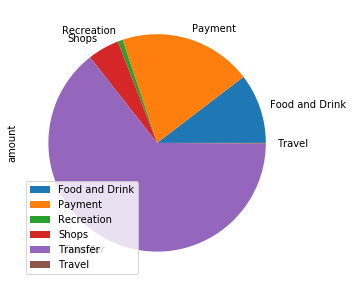

In [61]:
# Create a spending categories pie chart.

plot = expenses_by_category.plot.pie(subplots=True, figsize=(5, 5))

### Calculate the expenses per month

In [71]:
# Create a DataFrame with the expenses and dates - this is a quicker and simpler way than creating a dataframe.

expenses_by_month = transactions_df.groupby(pd.Grouper(freq='M')).sum()

expenses_by_month.head()

,amount
date,
2020-05-31,10645.24
2020-06-30,10645.24
2020-07-31,10645.24


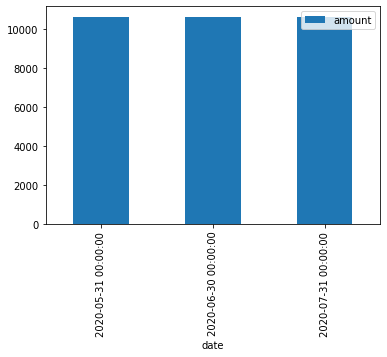

In [74]:
# Create a spending per month bar chart

plot = expenses_by_month.plot.bar()